In [ ]:
import json
import pickle

In [ ]:
"""
    file_name:
        gme_qwen2vl2b_text.pkl
        gme_qwen2vl2b_image.pkl
        gme_qwen2vl2b_fused.pkl
"""

dataset_name = 'beauty'

with open(f'{dataset_name}/gme_qwen2vl2b_text.pkl', 'rb') as f:
    text_embeddings = pickle.load(f)

with open(f'{dataset_name}/gme_qwen2vl2b_image.pkl', 'rb') as f:
    image_embeddings = pickle.load(f)

with open(f'{dataset_name}/gme_qwen2vl2b_fused.pkl', 'rb') as f:
    fused_embeddings = pickle.load(f)

with open(f'{dataset_name}/id_map.json', 'r') as f:
    id_map = json.load(f)




Loading embeddings for the 'beauty' dataset...
✅ Embeddings loaded successfully.
Shape of embeddings arrays: (12101, 1536)

--- 🔬 Macro-level Structural Property Analysis ---
Total Variance of Text Embeddings:  0.4211
Total Variance of Image Embeddings: 0.5474

[해석] Image 임베딩이 Text 임베딩보다 표현 공간에 더 넓게 분포(분산이 더 큼)합니다.
이는 이미지 양식이 아이템 간의 시각적 차이를 더 다양하게 표현하고 있을 가능성을 시사합니다.
(참고: 1536차원 단위 벡터에서 분산은 하이퍼스피어(hypersphere) 상의 퍼짐 정도를 의미합니다.)

--- 🧬 Modality Alignment Analysis ---
Calculating similarity for 12101 items...
✅ Similarity calculation complete.

--- 📊 Similarity Analysis Results ---
Mean Similarity:   0.5059
Std Deviation:     0.0939

Generating similarity distribution histogram...
✅ Histogram saved as 'similarity_distribution_beauty.png'


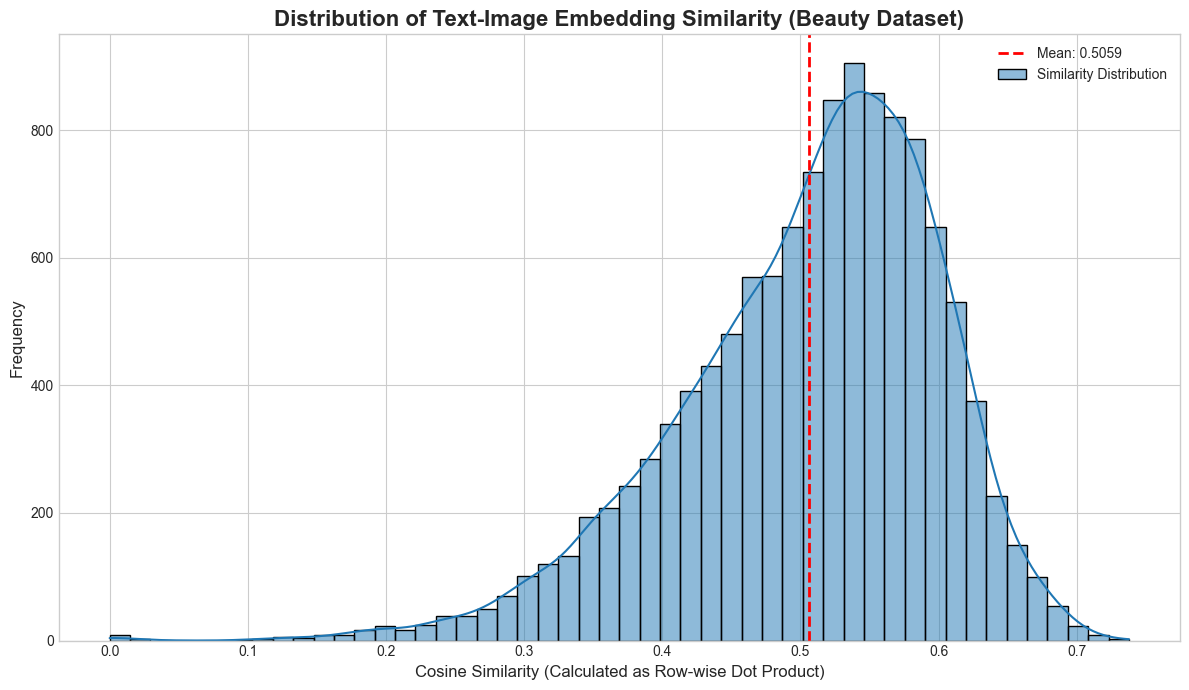

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. 데이터 로딩 ---
dataset_name = 'beauty'
base_path = f'./{dataset_name}/'
text_emb_path = f'{base_path}gme_qwen2vl2b_text.pkl'
image_emb_path = f'{base_path}gme_qwen2vl2b_image.pkl'

print(f"Loading embeddings for the '{dataset_name}' dataset...")
with open(text_emb_path, 'rb') as f:
    text_embeddings = pickle.load(f)
with open(image_emb_path, 'rb') as f:
    image_embeddings = pickle.load(f)
print("✅ Embeddings loaded successfully.")

# --- 2. 거시적 구조 분석: 전체 분산 비교 ---
print("\n--- 🔬 Macro-level Structural Property Analysis ---")

# 각 임베딩의 전체 분산 계산
# 전체 분산 = 각 차원(feature)의 분산의 총합
text_total_variance = np.sum(np.var(text_embeddings, axis=0))
image_total_variance = np.sum(np.var(image_embeddings, axis=0))

print(f"Total Variance of Text Embeddings:  {text_total_variance:.4f}")
print(f"Total Variance of Image Embeddings: {image_total_variance:.4f}")

# 분산 값에 대한 해석 제공
if text_total_variance > image_total_variance * 1.1: # 유의미한 차이를 위해 10% 이상 클 때로 가정
    print("\n[해석] Text 임베딩이 Image 임베딩보다 표현 공간에 더 넓게 분포(분산이 더 큼)합니다.")
    print("이는 텍스트 양식이 아이템 간의 차이를 더 다양하게 표현하고 있을 가능성을 시사합니다.")
elif image_total_variance > text_total_variance * 1.1:
    print("\n[해석] Image 임베딩이 Text 임베딩보다 표현 공간에 더 넓게 분포(분산이 더 큼)합니다.")
    print("이는 이미지 양식이 아이템 간의 시각적 차이를 더 다양하게 표현하고 있을 가능성을 시사합니다.")
else:
    print("\n[해석] 두 임베딩 공간의 전반적인 분포 넓이(다양성)는 유사한 수준입니다.")

embedding_dim = text_embeddings.shape[1]
print(f"(참고: {embedding_dim}차원 단위 벡터에서 분산은 하이퍼스피어(hypersphere) 상의 퍼짐 정도를 의미합니다.)")


# --- 4. 유사도 계산 (벡터화 방식) ---
print("\n--- 🧬 Modality Alignment Analysis ---")
print(f"Calculating similarity for {text_embeddings.shape[0]} items...")
similarities = np.sum(text_embeddings * image_embeddings, axis=1)
print("✅ Similarity calculation complete.")

# --- 5. 유사도 결과 분석 및 출력 ---
print("\n--- 📊 Similarity Analysis Results ---")
print(f"Mean Similarity:   {np.mean(similarities):.4f}")
print(f"Std Deviation:     {np.std(similarities):.4f}")
# (이하 통계 출력 및 해석은 이전과 동일)
# ...


# --- 6. 결과 시각화 ---
print("\nGenerating similarity distribution histogram...")
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))
sns.histplot(similarities, bins=50, kde=True, ax=ax, label='Similarity Distribution')
ax.axvline(np.mean(similarities), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(similarities):.4f}')
ax.set_title(f'Distribution of Text-Image Embedding Similarity ({dataset_name.capitalize()} Dataset)', fontsize=16, weight='bold')
ax.set_xlabel('Cosine Similarity (Calculated as Row-wise Dot Product)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.legend()
plt.tight_layout()
output_filename = f'similarity_distribution_{dataset_name}.png'
plt.savefig(output_filename)
print(f"✅ Histogram saved as '{output_filename}'")
plt.show()

Loading embeddings for the 'home' dataset...
✅ Embeddings loaded successfully.

--- 🔬 Macro-level Structural Property Analysis ---
Total Variance of Text Embeddings:  0.3362
Total Variance of Image Embeddings: 0.4309
Total Variance of Text-Image Embeddings: 0.3657

--- 🧬 Modality Alignment Analysis ---
Calculating similarity for 28237 items...
✅ Similarity calculation complete.

--- 📊 Similarity Analysis Results ---
Text-Image Mean Similarity:   0.4436
Text-TextImage Mean Similarity:   0.9058
Image-TextImage Mean Similarity:   0.5928
Text-Image Std Deviation:     0.0847
Text-TextImage Std Deviation:     0.0497
Image-TextImage Std Deviation:     0.0768

Generating similarity distribution histogram...
✅ Histogram saved as 't_i_similarity_distribution_home.png'


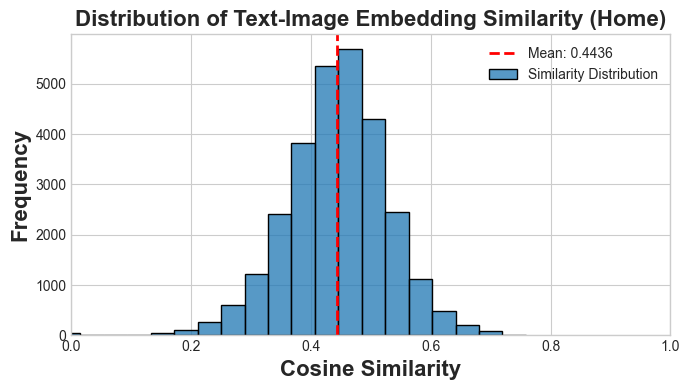

✅ Histogram saved as 't_ti_similarity_distribution_home.png'


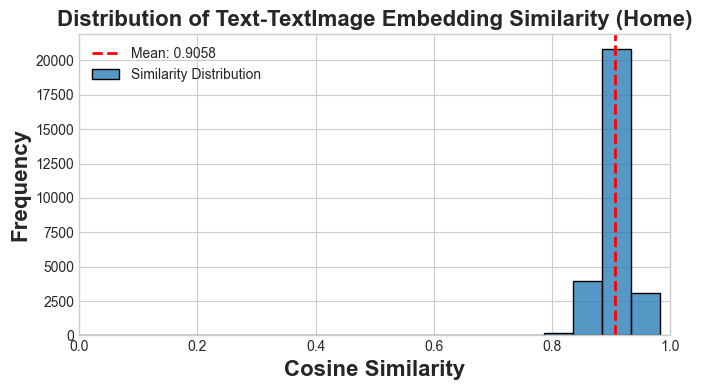

✅ Histogram saved as 'i_ti_similarity_distribution_home.png'


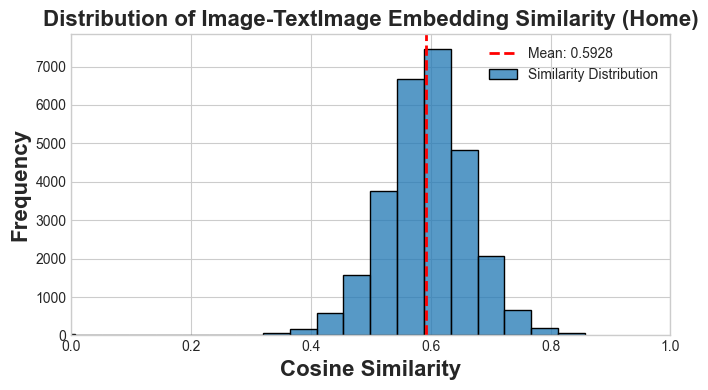

Loading embeddings for the 'sports' dataset...
✅ Embeddings loaded successfully.

--- 🔬 Macro-level Structural Property Analysis ---
Total Variance of Text Embeddings:  0.3845
Total Variance of Image Embeddings: 0.5073
Total Variance of Text-Image Embeddings: 0.4307

--- 🧬 Modality Alignment Analysis ---
Calculating similarity for 18357 items...
✅ Similarity calculation complete.

--- 📊 Similarity Analysis Results ---
Text-Image Mean Similarity:   0.4187
Text-TextImage Mean Similarity:   0.9077
Image-TextImage Mean Similarity:   0.5591
Text-Image Std Deviation:     0.0945
Text-TextImage Std Deviation:     0.0664
Image-TextImage Std Deviation:     0.0865

Generating similarity distribution histogram...
✅ Histogram saved as 't_i_similarity_distribution_sports.png'


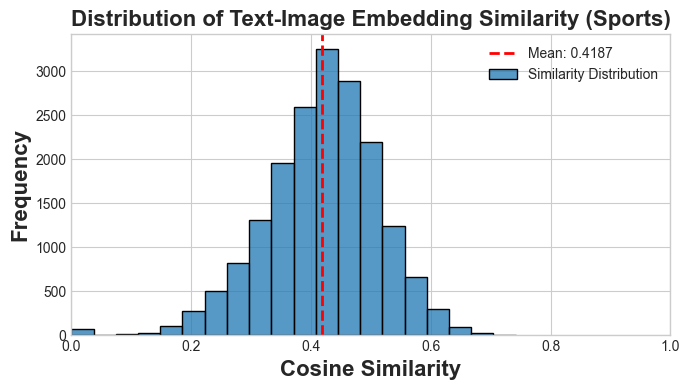

✅ Histogram saved as 't_ti_similarity_distribution_sports.png'


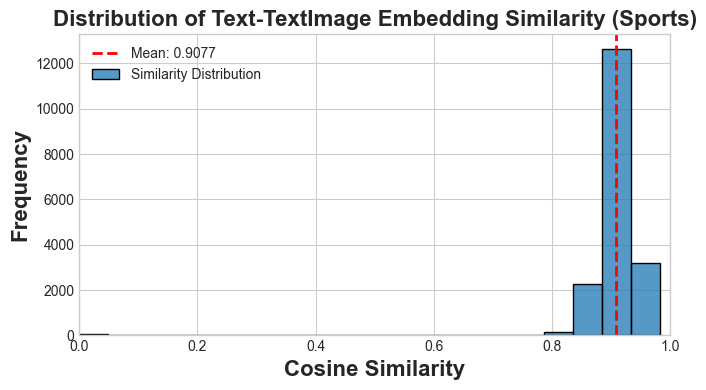

✅ Histogram saved as 'i_ti_similarity_distribution_sports.png'


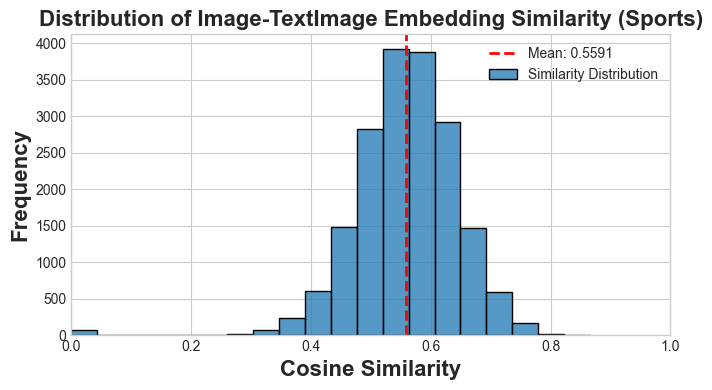

Loading embeddings for the 'toys' dataset...
✅ Embeddings loaded successfully.

--- 🔬 Macro-level Structural Property Analysis ---
Total Variance of Text Embeddings:  0.4324
Total Variance of Image Embeddings: 0.5864
Total Variance of Text-Image Embeddings: 0.4790

--- 🧬 Modality Alignment Analysis ---
Calculating similarity for 11924 items...
✅ Similarity calculation complete.

--- 📊 Similarity Analysis Results ---
Text-Image Mean Similarity:   0.4915
Text-TextImage Mean Similarity:   0.9077
Image-TextImage Mean Similarity:   0.6318
Text-Image Std Deviation:     0.0950
Text-TextImage Std Deviation:     0.0416
Image-TextImage Std Deviation:     0.0856

Generating similarity distribution histogram...
✅ Histogram saved as 't_i_similarity_distribution_toys.png'


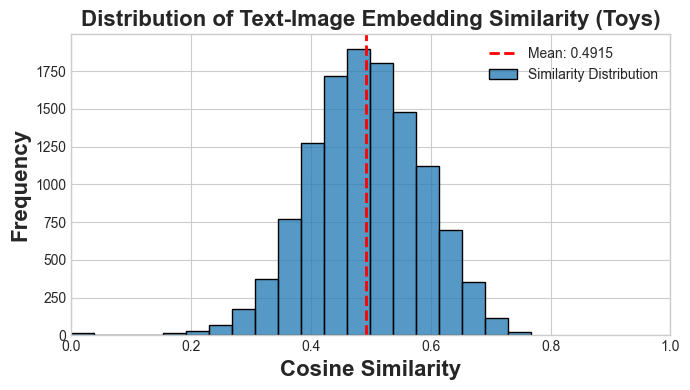

✅ Histogram saved as 't_ti_similarity_distribution_toys.png'


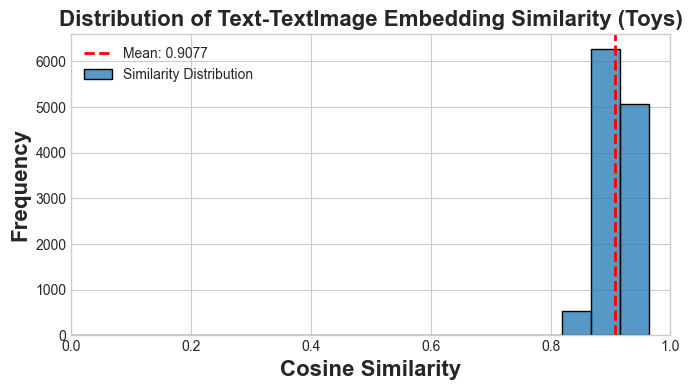

✅ Histogram saved as 'i_ti_similarity_distribution_toys.png'


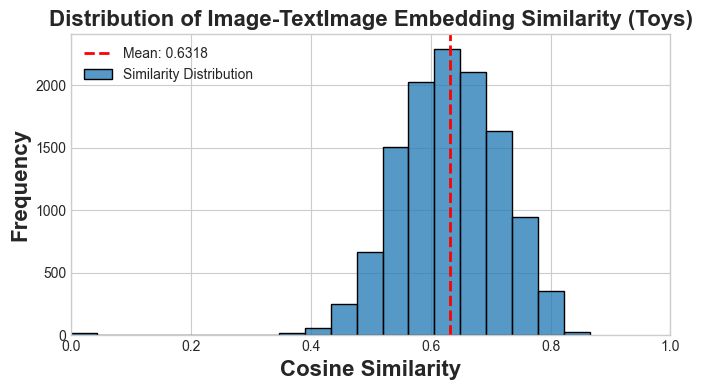

In [17]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. 데이터 로딩 ---

dataset_names = ['home', 'sports', 'toys']
for dataset_name in dataset_names:
    base_path = f'./{dataset_name}/'
    text_emb_path = f'{base_path}gme_qwen2vl2b_text.pkl'
    image_emb_path = f'{base_path}gme_qwen2vl2b_image.pkl'
    text_image_emb_path = f'{base_path}gme_qwen2vl2b_fused.pkl'

    print(f"Loading embeddings for the '{dataset_name}' dataset...")
    with open(text_emb_path, 'rb') as f:
        text_embeddings = pickle.load(f)
    with open(image_emb_path, 'rb') as f:
        image_embeddings = pickle.load(f)
    with open(text_image_emb_path, 'rb') as f:
        text_image_embeddings = pickle.load(f)
    print("✅ Embeddings loaded successfully.")

    # --- 2. 거시적 구조 분석: 전체 분산 비교 ---
    print("\n--- 🔬 Macro-level Structural Property Analysis ---")

    # 각 임베딩의 전체 분산 계산
    # 전체 분산 = 각 차원(feature)의 분산의 총합
    text_total_variance = np.sum(np.var(text_embeddings, axis=0))
    image_total_variance = np.sum(np.var(image_embeddings, axis=0))
    text_image_total_variance = np.sum(np.var(text_image_embeddings, axis=0))

    print(f"Total Variance of Text Embeddings:  {text_total_variance:.4f}")
    print(f"Total Variance of Image Embeddings: {image_total_variance:.4f}")
    print(f"Total Variance of Text-Image Embeddings: {text_image_total_variance:.4f}")

    # --- 3. 유사도 계산 (벡터화 방식) ---
    print("\n--- 🧬 Modality Alignment Analysis ---")
    print(f"Calculating similarity for {text_embeddings.shape[0]} items...")
    t_i_similarities = np.sum(text_embeddings * image_embeddings, axis=1)
    t_ti_similarities = np.sum(text_embeddings * text_image_embeddings, axis=1)
    i_ti_similarities = np.sum(image_embeddings * text_image_embeddings, axis=1)
    print("✅ Similarity calculation complete.")

    # --- 4. 유사도 결과 분석 및 출력 ---
    print("\n--- 📊 Similarity Analysis Results ---")
    print(f"Text-Image Mean Similarity:   {np.mean(t_i_similarities):.4f}")
    print(f"Text-TextImage Mean Similarity:   {np.mean(t_ti_similarities):.4f}")
    print(f"Image-TextImage Mean Similarity:   {np.mean(i_ti_similarities):.4f}")

    print(f"Text-Image Std Deviation:     {np.std(t_i_similarities):.4f}")
    print(f"Text-TextImage Std Deviation:     {np.std(t_ti_similarities):.4f}")
    print(f"Image-TextImage Std Deviation:     {np.std(i_ti_similarities):.4f}")

    label_fontsize = 16

    # --- 5. 결과 시각화 ---
    print("\nGenerating similarity distribution histogram...")
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(7, 4))
    sns.histplot(t_i_similarities, bins=20, ax=ax, label='Similarity Distribution')
    ax.axvline(np.mean(t_i_similarities), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(t_i_similarities):.4f}')
    ax.set_xlim(0, 1)
    ax.set_title(f'Distribution of Text-Image Embedding Similarity ({dataset_name.capitalize()})', fontsize=16, weight='bold')
    ax.set_xlabel('Cosine Similarity', fontsize=label_fontsize, weight='bold')
    ax.set_ylabel('Frequency', fontsize=label_fontsize, weight='bold')
    ax.legend()
    plt.tight_layout()
    output_filename = f't_i_similarity_distribution_{dataset_name}.png'
    plt.savefig(output_filename)
    print(f"✅ Histogram saved as '{output_filename}'")
    plt.show()

    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(7, 4))
    sns.histplot(t_ti_similarities, bins=20, ax=ax, label='Similarity Distribution')
    ax.axvline(np.mean(t_ti_similarities), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(t_ti_similarities):.4f}')
    ax.set_xlim(0, 1)
    ax.set_title(f'Distribution of Text-TextImage Embedding Similarity ({dataset_name.capitalize()})', fontsize=16, weight='bold')
    ax.set_xlabel('Cosine Similarity', fontsize=label_fontsize, weight='bold')
    ax.set_ylabel('Frequency', fontsize=label_fontsize, weight='bold')
    ax.legend()
    plt.tight_layout()
    output_filename = f't_ti_similarity_distribution_{dataset_name}.png'
    plt.savefig(output_filename)
    print(f"✅ Histogram saved as '{output_filename}'")
    plt.show()

    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(7, 4))
    sns.histplot(i_ti_similarities, bins=20, ax=ax, label='Similarity Distribution')
    ax.axvline(np.mean(i_ti_similarities), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(i_ti_similarities):.4f}')
    ax.set_xlim(0, 1)
    ax.set_title(f'Distribution of Image-TextImage Embedding Similarity ({dataset_name.capitalize()})', fontsize=16, weight='bold')
    ax.set_xlabel('Cosine Similarity', fontsize=label_fontsize, weight='bold')
    ax.set_ylabel('Frequency', fontsize=label_fontsize, weight='bold')
    ax.legend()
    plt.tight_layout()
    output_filename = f'i_ti_similarity_distribution_{dataset_name}.png'
    plt.savefig(output_filename)
    print(f"✅ Histogram saved as '{output_filename}'")
    plt.show()
